# Test `pairs_trading.cointegration`  

Here we're trying to test one of the functions for the pairs trading package (cointegration)

In [1]:
import sys
for path in sys.path:
    print(path)
sys.path.append("/Users/vincenttrost/trading/pairs_trading/")

/Users/vincenttrost/trading/pairs_trading/tests
/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python38.zip
/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python3.8
/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python3.8/lib-dynload

/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python3.8/site-packages
/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/extensions
/Users/vincenttrost/.ipython


In [2]:
import pairs_trading as pt
import datatable as dt
from datatable import f
import yfinance as yf

In [ ]:
dir(pt)

In [3]:
#the sample i am using are NVDA and AMD from 2013 to 2014
stdate='2013-01-01'
eddate='2014-12-31'
ticker1='NVDA'
ticker2='AMD'

#extract data
asset1=yf.download(ticker1,start=stdate,end=eddate)
asset2=yf.download(ticker2,start=stdate,end=eddate)  



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
#create signals
signals=pt.signal_generation(asset1,asset2,pt.EG_method)
#only viz the part where trading signals occur
ind=signals['z'].dropna().index[0]

/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/vincenttrost/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [5]:
signals[ind:].head()

,asset1,asset2,signals1,signals2,z,z upper limit,z lower limit,fitted,residual,positions1,positions2
2014-03-20,18.570000,4.05,0,0,-0.247146,0.175868,-0.670161,4.154547,-0.104547,0.0,0.0
2014-03-21,18.540001,4.04,0,0,-0.259950,0.175868,-0.670161,4.149963,-0.109963,0.0,0.0
2014-03-24,18.450001,4.05,0,0,-0.203799,0.175868,-0.670161,4.136210,-0.086210,0.0,0.0
2014-03-25,18.450001,4.05,0,0,-0.203799,0.175868,-0.670161,4.136210,-0.086210,0.0,0.0
2014-03-26,18.030001,4.05,0,0,0.042814,0.455946,-0.370318,4.032312,0.017688,0.0,0.0


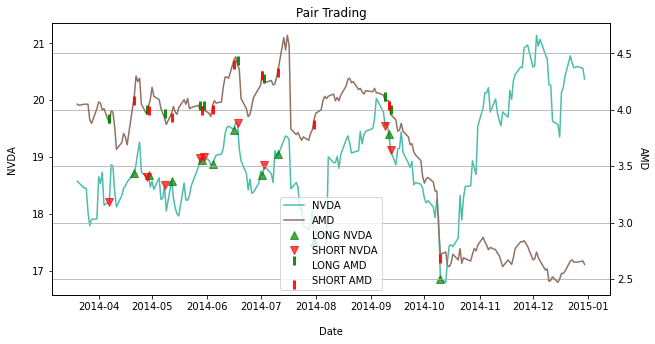

In [6]:
#viz positions
pt.plot(signals[ind:],ticker1,ticker2)    

/Users/vincenttrost/trading/pairs_trading/pairs_trading/portfolio.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cumsum1']=df1['positions1'].cumsum()
/Users/vincenttrost/trading/pairs_trading/pairs_trading/portfolio.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cumsum2']=df1['positions2'].cumsum()


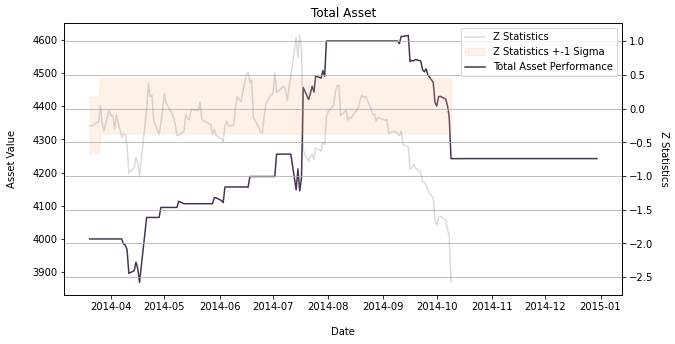

In [7]:
#viz portfolio performance
portfolio_details=pt.portfolio(signals[ind:])